# Revisão

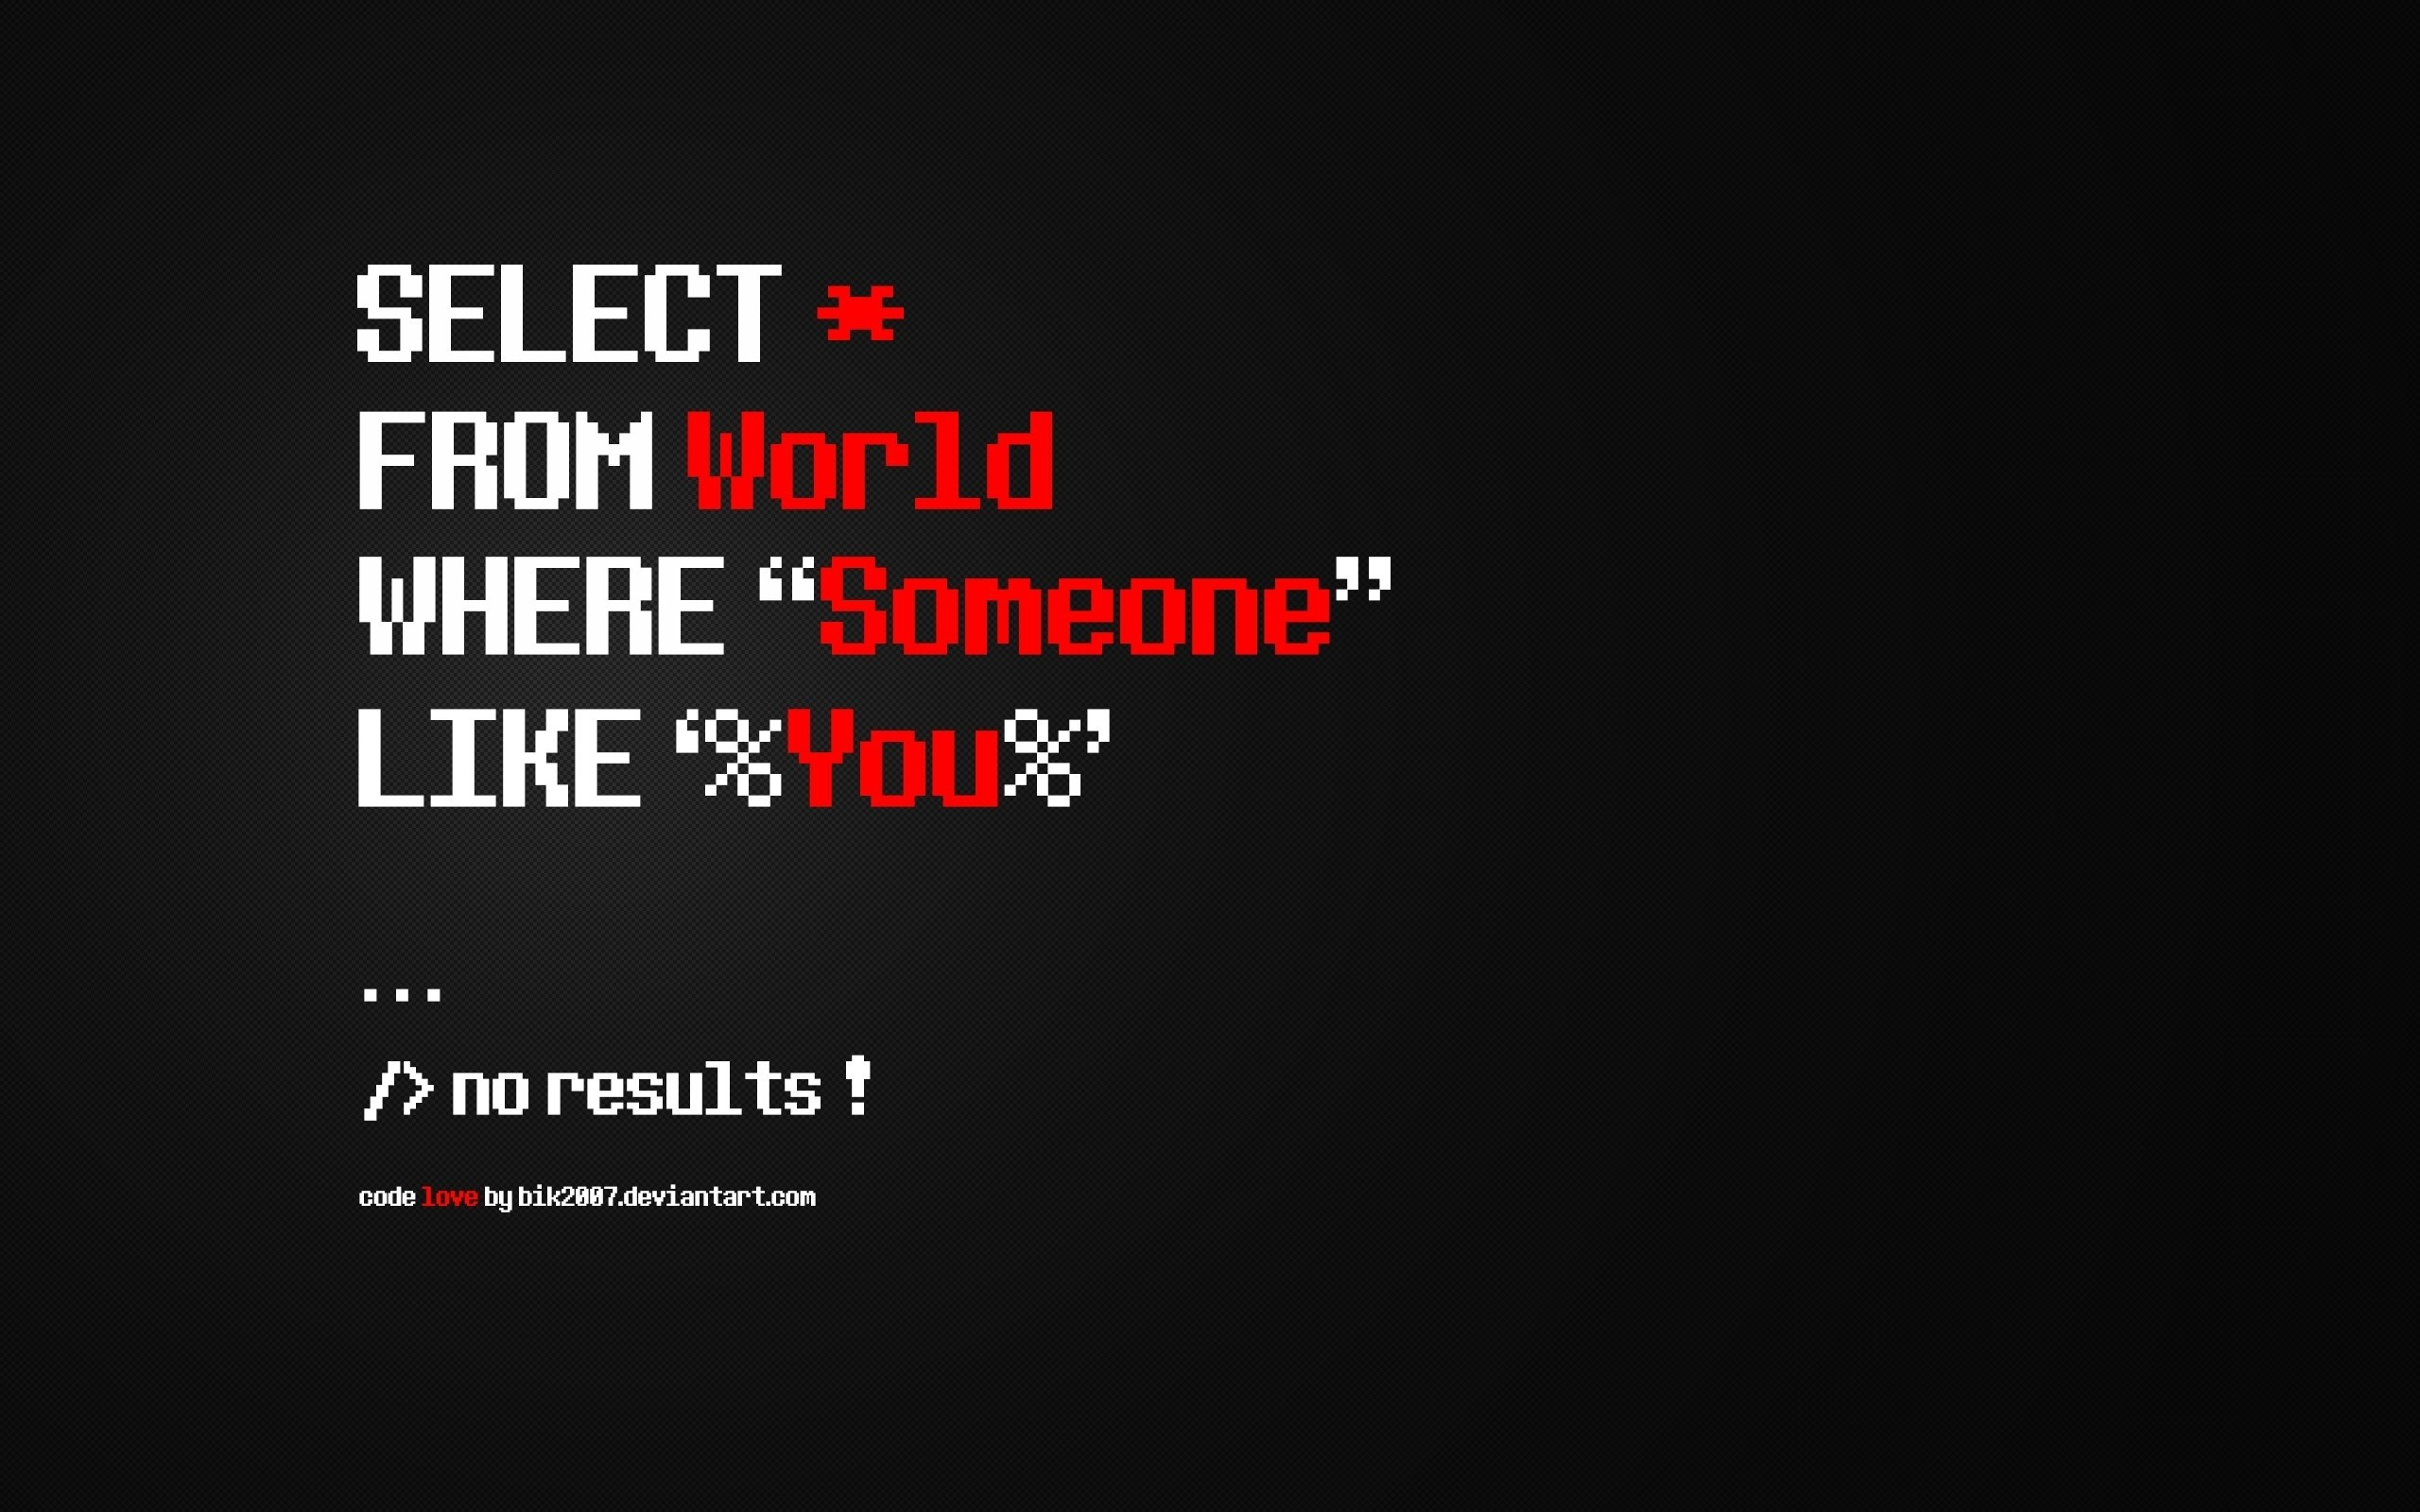

[Material](https://docs.google.com/presentation/d/1RXD0sykKkwOY75Kg4AHYmaGoo4l98RphoMmaL_4346g/edit#slide=id.p1)

# Aula 02: Ordenando consultas e Manipulando datas e strings

Na aula de hoje iremos aplicar os conceitos da aula passada e explorar outros comandos da linguagem SQL.

# Habilidades a serem desenvolvidas

Ao final da aula, o aluno deve:
1. Saber aplicar o comando ORDER BY;
1. Entender o uso da função CAST;
1. Acessar e manipular datas e horários;
1. Saber como manipular strings;
1. Saber como tratar dados usando a função CASE.

# Atenção!

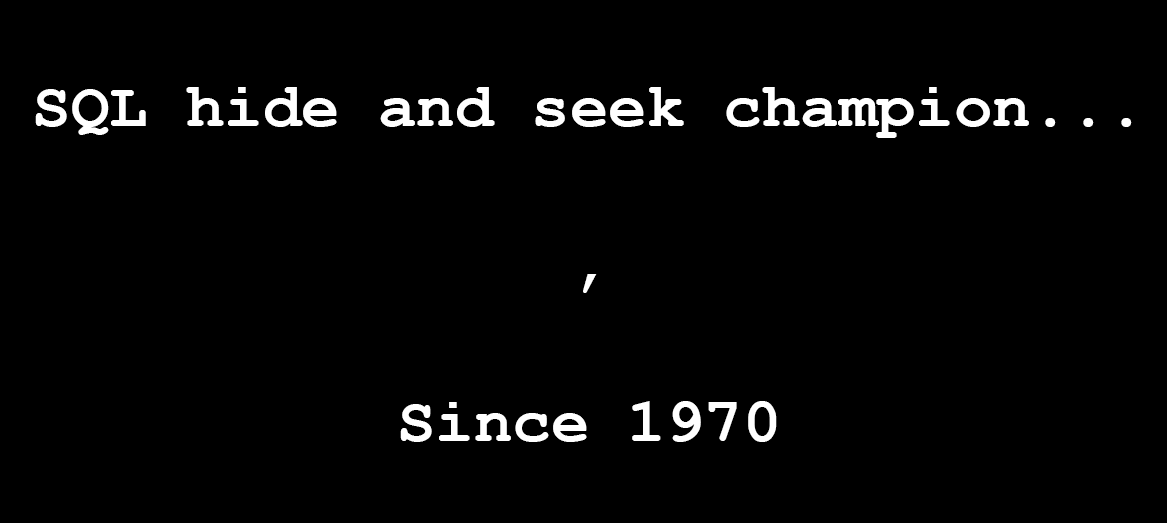

# SQL: continuação

## ORDER BY

**Ascending:** Selecione todos os dados da tabela customers e ordene a tabela em ordem crescente do nome dos contatos.

    Select * from customers
    ORDER BY contact_name;

**Descending:** Escolha apenas as colunas company_name e city da tabela customers e ordene em pelo nome da cidade em ordem decrescente.

    Select company_name, city 
    FROM customers
    ORDER BY city DESC;

## CASE

### CASE WHEN ... THEN ... END
Crie uma coluna `prioridade` que tenha o valor `Priority 1` quando o contact_title for `Owner`

    Select *, 
    CASE WHEN contact_title = 'Owner' THEN 'Priority 1' END as prioridade
    FROM customers;

### CASE WHEN ... THEN ... WHEN ... THEN ...ELSE ... END
Popule a coluna `prioridade` com valor `Priority 2` quando o contact_title for `Sales Manager`, `Priority 3` para `Marketing Manager` e `Priority 4` para outros cargos.

    Select contact_title, 
    CASE 
    WHEN contact_title = 'Owner' THEN 'Priority 1' 
    WHEN contact_title = 'Sales Manager' then 'Priority 2'
    WHEN contact_title = 'Marketing Manager' then 'Priority 3'
    ELSE 'Priority 4'
    END as prioridade
    FROM customers;

    Select contact_title, 
    CASE 
    WHEN contact_title LIKE '%Owner%' THEN 'Priority 1' 
    WHEN contact_title Like '%Manager%' then 'Priority 2'
    WHEN contact_title like '%Sales%' then 'Priority 3'
    ELSE 'Priority 4'
    END as prioridade
    FROM customers;

### Coooooool

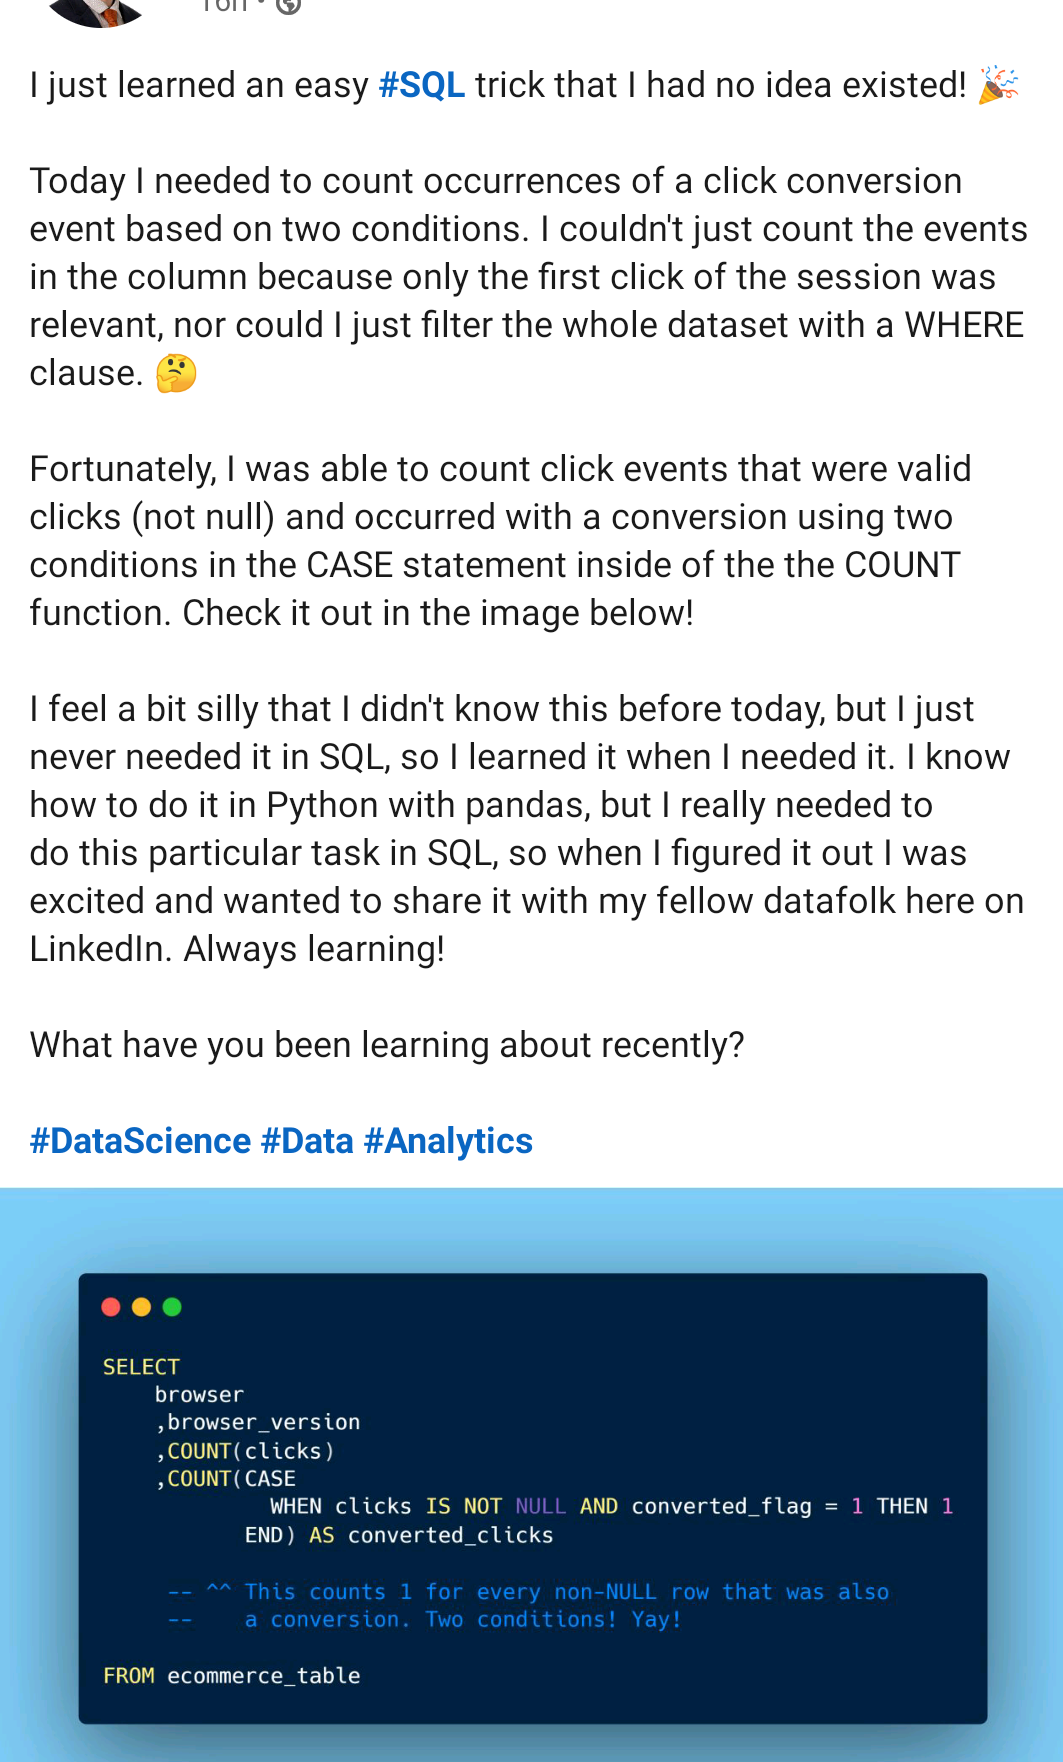

## CAST
- INTEGER
- DATE
- VARCHAR
- NUMERIC
- OUTROS ...

### SELECT CAST

    Select cast('2' as integer);

    SELECT cast(birth_date as varchar) from employees;

### SELECT  ::

    Select '2'::integer;

    SELECT birth_date::varchar from employees;

## TIME FUNCTIONS

### CURRENT_DATE
Que dia é hoje?

    SELECT CURRENT_DATE;

### CURRENT_TIME
Que horas são?

    SELECT CURRENT_TIME;

### NOW
Tudo junto!

    SELECT NOW();

### DATE_PART

**Dia, mês e ano.**

    SELECT DATE_PART('year', now())
    
    - 'month'
    - 'day'
    - 'hour'
    - 'minute'
    - 'second'

Selecione o dia de nascimento de todos os empregados.

    SELECT first_name, birth_date, date_part('day', birth_date) from employees;

    SELECT * from employees
    where date_part('year', hire_date) = 1993

    Select first_name, birth_date, EXTRACT(day from birth_date)from employees;

    -- em alguns SGBS...
    Select first_name, birth_date, DAY(birth_date) from employees;

### DATE_TRUNC
**Dia, mês e ano.**


    SELECT first_name, birth_date, DATE_TRUNC('day', birth_date) from employees;

**Obs:** Sempre retorna um timestamp!

### Operações com data/hora

    Select current_date + 35

#### AGE

    Select birth_date, (current_date - birth_date) / 365.25::integer from employees;

    SELECT birth_date, AGE(birth_date) from employees;

## STRING FUNCTIONS

### CONCAT ou ||
Junta pedaços de texto num único output.

Ex: Crie um campo com o primeiro e último nomes dos empregados.

    SELECT concat('filipe', ' furlan');

    SELECT 'filipe' || ' furlan';

    select first_name || ' ' || last_name from employees;

### UPPER e LOWER
Transforma todos a caixa de todos os caracteres.

EX: Traga o nome dos funcionários em letras maiusculas.

    SELECT 'GaBriel', LOWER('GaBriel'), UPPER('GaBriel');

    SELECT first_name, LOWER(first_name), UPPER(first_name) from employees;

### TRIM 
Remove espaços em branco.

     SELECT 
     '           filipe              ' original, 
     TRIM('           filipe              ') trim_total,
     RTRIM('           filipe              ') as trim_direita,
     LTRIM('           filipe              ') trim_esquerda;
     
     -- trim não remove espaço entre palavras
     Select trim('   abc   def   ')

### SUBSTRING
Retorna um pedaço de texto num intervalo determinado.


    SELECT SUBSTRING('E ai turma 785!', 1, 4)
    
    --retorna 'E ai'
    
    SELECT SUBSTRING('E ai turma 785!', 5, 6);
    
    -- retorna turma

**RIGHT**: Seciona o número de caracteres, contando da direita.


    SELECT RIGHT('E ai turma 785!', 4);
    -- retorna '785!

**LEFT**: Seciona o número de caracteres, contando da esquerda.


    SELECT LEFT('E ai turma 785!', 4);
    -- retorna 'E ai'

### POSITION
Retorna a posição de um caracter ou sequência.

    Select Position('G' in 'Guilherme');

    Select Position('e' in 'Guilherme');

    Select Position('lhe' in 'Guilherme');

    Select position('abc' in 'abfdghr~ijfabcojkgrj');

### Replace
Troca uma sequência de caracteres por outra.

Ex: Troque a palavra 'Sales' por 'Vendas' no cargo dos funcionários.

    Select replace('André Picolé', 'ré', 'e...');

    Select replace('André Picolé', 'é', 'e...');

    Select title, replace(title, 'Sales', 'Vendas') from employees; 

# Exercícios

Enviar para o email filipe.furlan@letcode.com.br até **2021/07/31** um arquivo de texto (`785_firstname_lastname_aula02.sql`) com a resolução dos exercicios abaixo.

IMPORTANTE: Inserir uma linha de comentário `-- exercicio XX` (XX = 1, 2A, 2B etc) antes de cada solução.

1. Selecione os id's únicos de territórios da tabela employee_territories e ordene em ordem decrescente.
1. Selecione da tabela empolyees (não esqueça de nomear as colunas criadas):
    1. O nome completo dos empregados em ordem alfabética;
    1. O nome completo dos empregados com o respectivo titulo em ordem decrescente;
    1. Os sobrenomes distintos dos empregrados;
    1. O ano de nascimento dos empregados usando funções de tempo;
    1. O ano de nascimento dos empregados usando funções de string;
    1. A idade atual dos empregados em ordem decrescente;
    1. A idade que os empregados tinham quando foram contratados em ordem crescente;
    1. Quem é e qual a idade do empregado mais velho?
    1. Qual a pessoa mais jovem que foi contratada?
    1. Crie uma coluna que mapeie os cargos dos empregados com a posição hierárquica na lista, sendo 1 o mais alto.
    1. O tempo de empresa dos respectivos empegados;
1. Selecione da tabela products:
    1. Os três produtos mais caros com seus respectivos preços;
    1. Os 10 produtos com estoque mais baixo (diferentes de 0) com suas respectivas quantidades;
    1. Os 5 produtos com maior valor agregado atualmente em estoque;
    1. Produtos com mais de 100 unidades no estoque ou valor unitário inferior 15;
1. Selecione da tabels orders:
    1. O primeiro nome do destinatário da entrega (ship_name);
    1. O tempo (em dias) entre a compra e a entrega;
    1. Os cinco fretes mais caros e com maior tempo de entrega (sem dados nulos);
    1. Os cinco fretes com maior tempo de entrega e mais caros (sem dados nulos); (sim, é diferente do anterior)
    1. Os 3 fretes mais baratos do Brasil.
    1. Uma tabela com as três primeiras letras do nome do pais, o tempo de entrega e o frete ordenados em ordem crescente.